<a href="https://colab.research.google.com/github/SuvitKumar003/Credit-Card-Fraud-Detection/blob/main/CreditrCardFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
dataset=pd.read_csv('/content/drive/MyDrive/with_aggregated.csv')

In [4]:
dataset.head()

,Unnamed: 0,step,action,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,...,count1h,count1d,count7d,count30d,mean_1h,mean_1d,mean_7d,mean_30d,time_x,time_y
0,0,0,TRANSFER,51.47,C5155482480,51.47,0.0,CC2160409073,0.0,51.47,...,1,1,1,1,51.47,51.47,51.47,51.47,1.0,0.0
1,1,0,CASH_OUT,51.47,CC2160409073,51.47,0.0,M2788501400,0.0,0.00,...,1,1,1,1,51.47,51.47,51.47,51.47,1.0,0.0
2,2,0,TRANSFER,306.06,C6262505545,306.06,0.0,CC9524765415,0.0,306.06,...,1,1,1,1,306.06,306.06,306.06,306.06,1.0,0.0
3,3,0,CASH_OUT,306.06,CC9524765415,306.06,0.0,M3707455010,0.0,0.00,...,1,1,1,1,306.06,306.06,306.06,306.06,1.0,0.0
4,4,0,TRANSFER,32.72,C6865329088,32.72,0.0,CC8773639961,0.0,32.72,...,1,1,1,1,32.72,32.72,32.72,32.72,1.0,0.0


In [5]:
for i in dataset.columns:
  print(i)

Unnamed: 0
step
action
amount
nameOrig
oldBalanceOrig
newBalanceOrig
nameDest
oldBalanceDest
newBalanceDest
isFraud
isFlaggedFraud
isUnauthorizedOverdraft
amount1h
amount1d
amount7d
amount30d
count1h
count1d
count7d
count30d
mean_1h
mean_1d
mean_7d
mean_30d
time_x
time_y


In [24]:
# Extracting numerical features from the dataset and storing it in a variable
numerical_features = dataset.select_dtypes(include=['float64', 'int64'])  # Selecting only numerical columns


In [7]:
for i in numerical_features:
  print(" The maximum value of feature ",i," is ",dataset[i].max())
  print(" The minimum value of feature ",i," is ",dataset[i].min())
  print(" The mean value of feature ",i," is ",dataset[i].mean())
  print(" The median value of feature ",i," is ",dataset[i].median())
  print(" The standard deviation value of feature ",i," is ",dataset[i].std())
  print("********************************************************************")

 The maximum value of feature  Unnamed: 0  is  5420480
 The minimum value of feature  Unnamed: 0  is  0
 The mean value of feature  Unnamed: 0  is  2710240.0
 The median value of feature  Unnamed: 0  is  2710240.0
 The standard deviation value of feature  Unnamed: 0  is  1564758.2265854026
********************************************************************
 The maximum value of feature  step  is  719
 The minimum value of feature  step  is  0
 The mean value of feature  step  is  346.9914760332155
 The median value of feature  step  is  332.0
 The standard deviation value of feature  step  is  203.30000446068092
********************************************************************
 The maximum value of feature  amount  is  24638739.4
 The minimum value of feature  amount  is  0.0
 The mean value of feature  amount  is  152206.4947525193
 The median value of feature  amount  is  86574.01
 The standard deviation value of feature  amount  is  461674.14707690565
***************************

**Visualization**

In [25]:
def visualize_numerical_feature(feature_name):

    # Access the feature using the feature name
    feature = dataset[feature_name]

    plt.figure(figsize=(10, 4))  # Create a new figure for the feature

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(feature, kde=True)
    plt.title(f'Histogram of {feature_name}')

    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=feature)
    plt.title(f'Boxplot of {feature_name}')

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()  # Show plot for the current feature


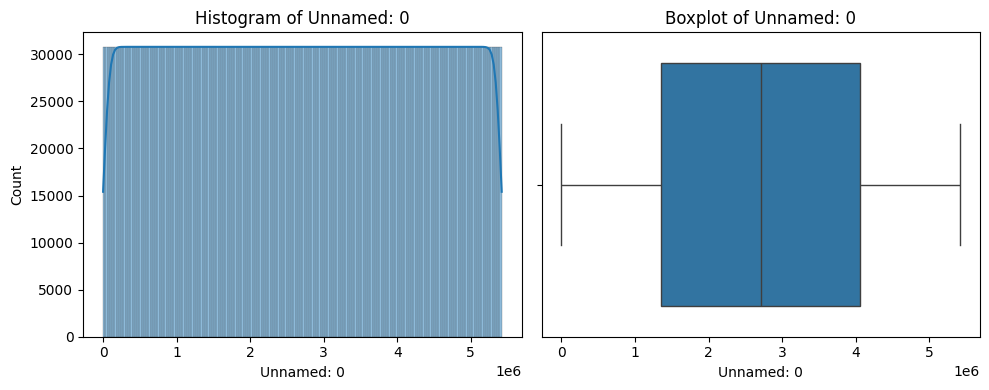

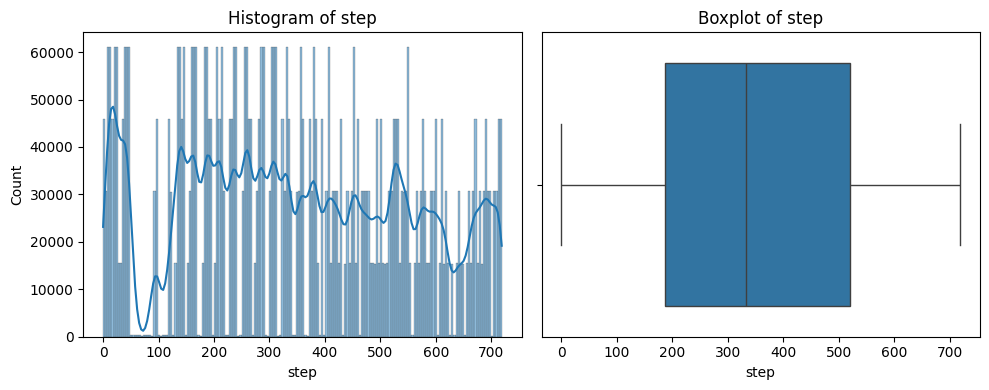

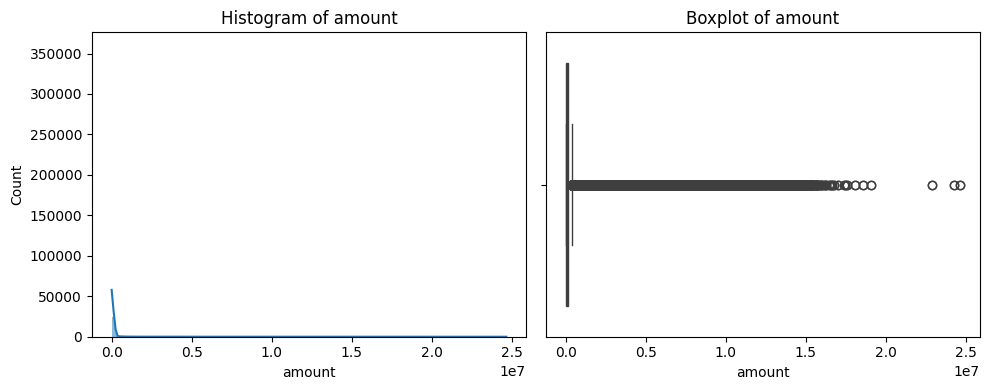

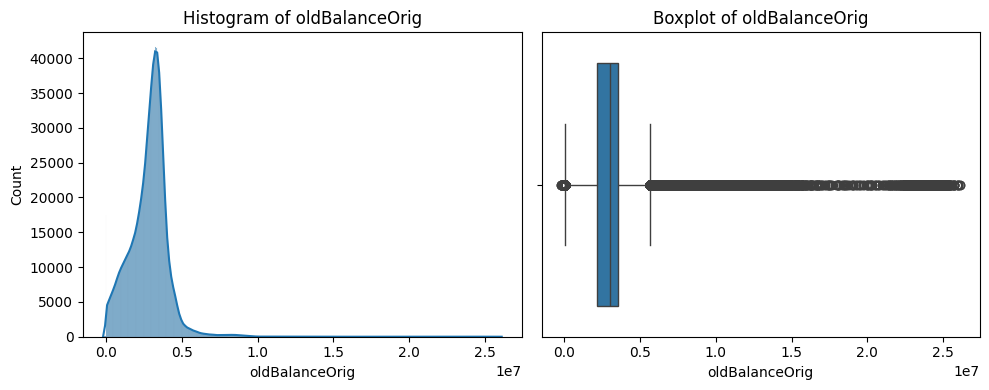

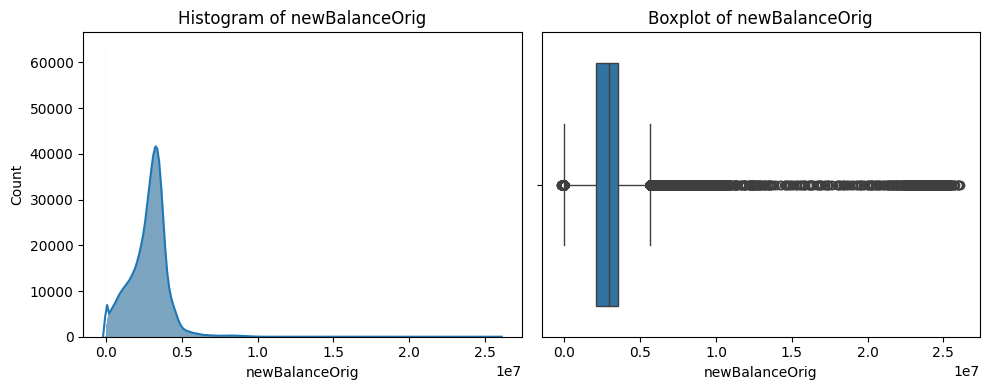

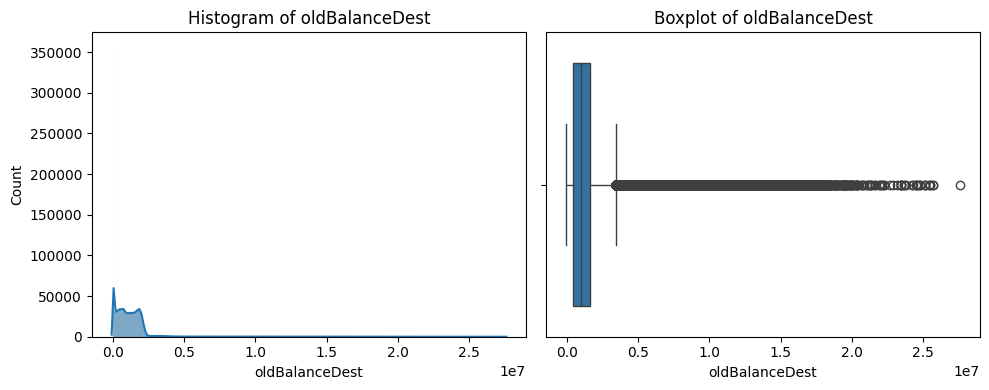

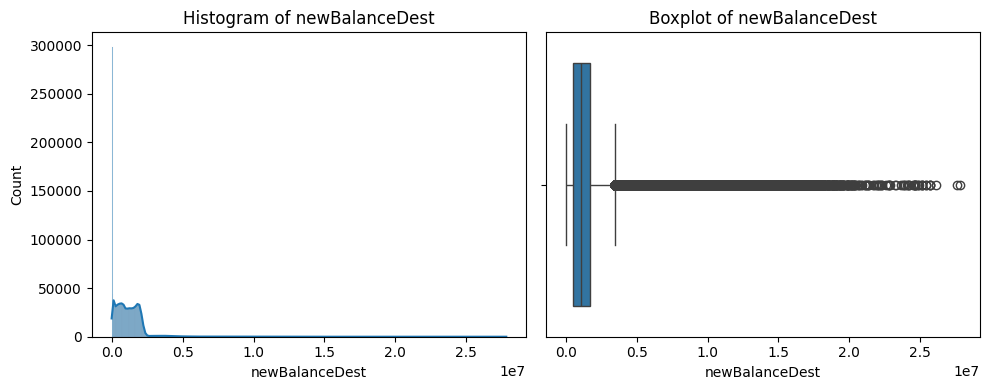

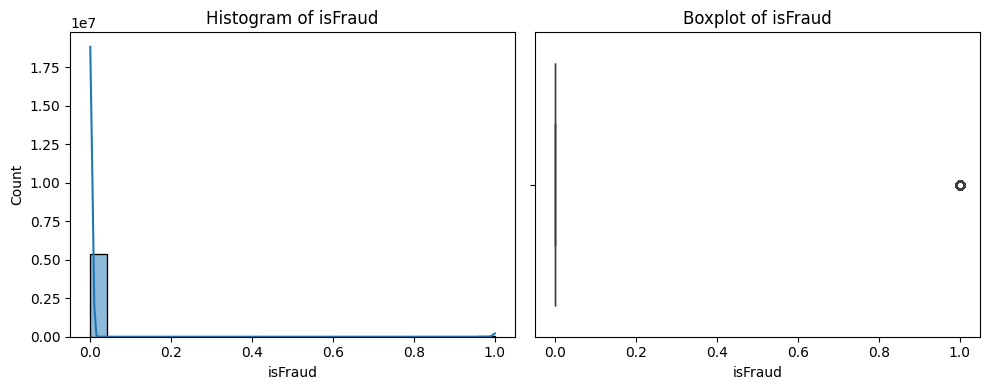

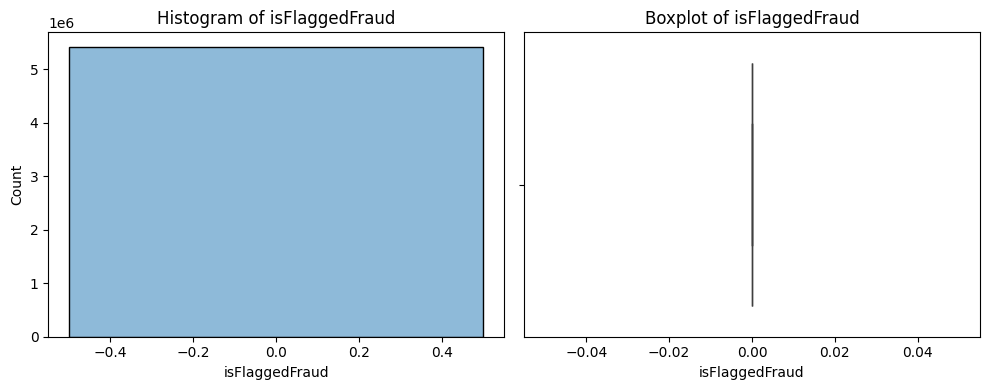

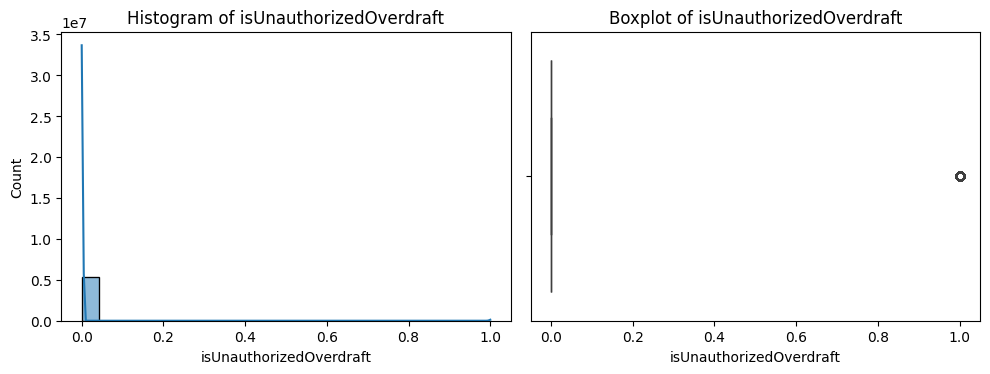

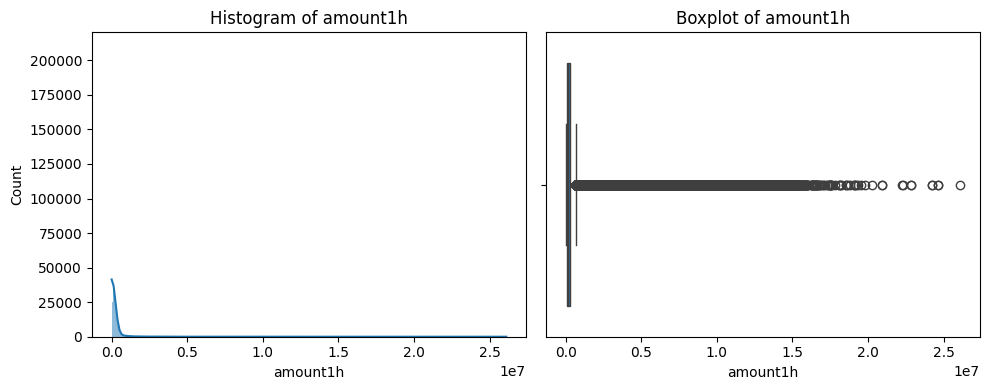

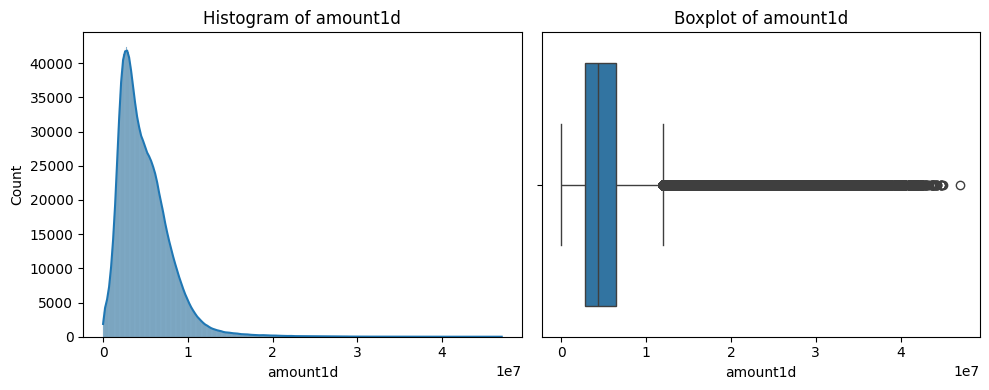

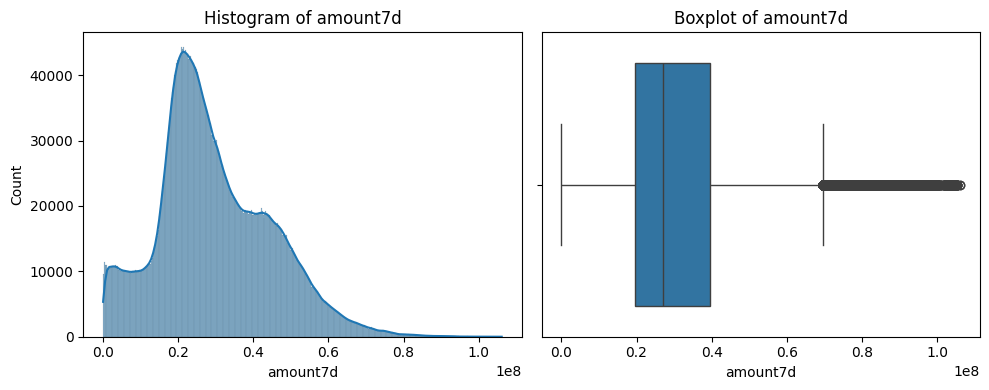

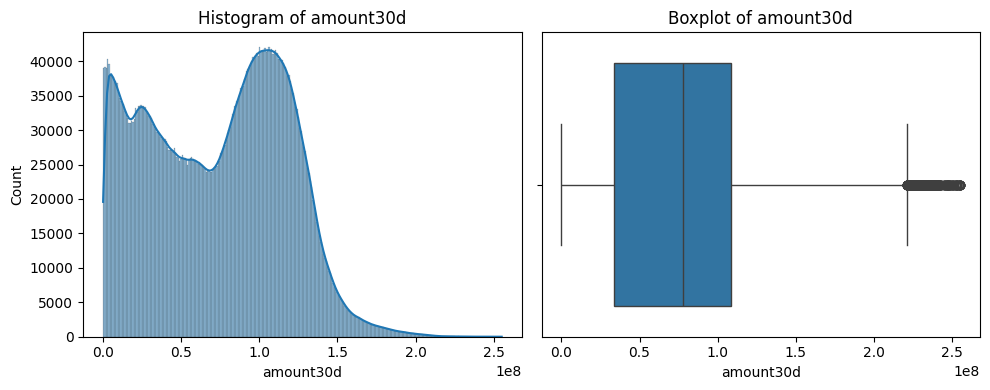

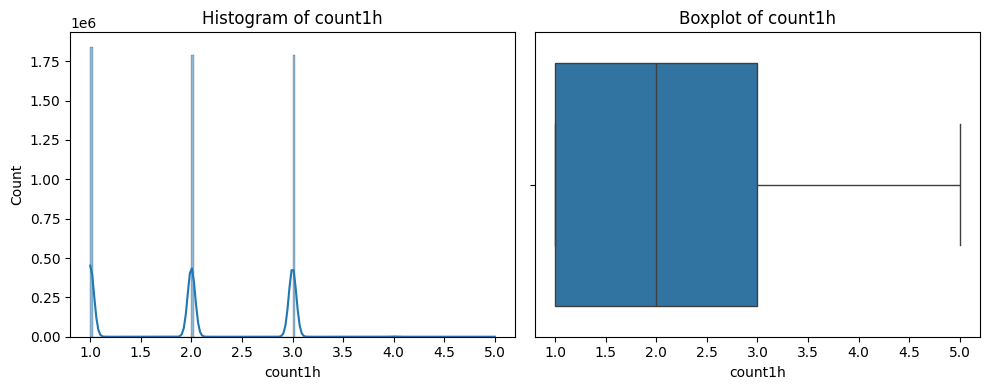

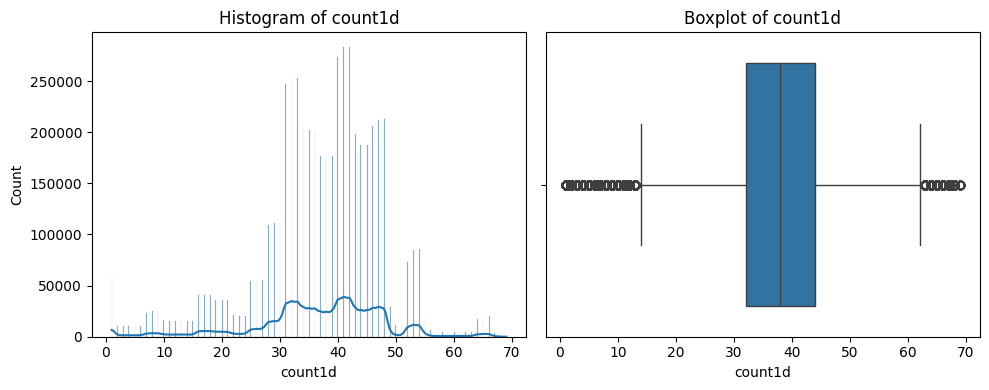

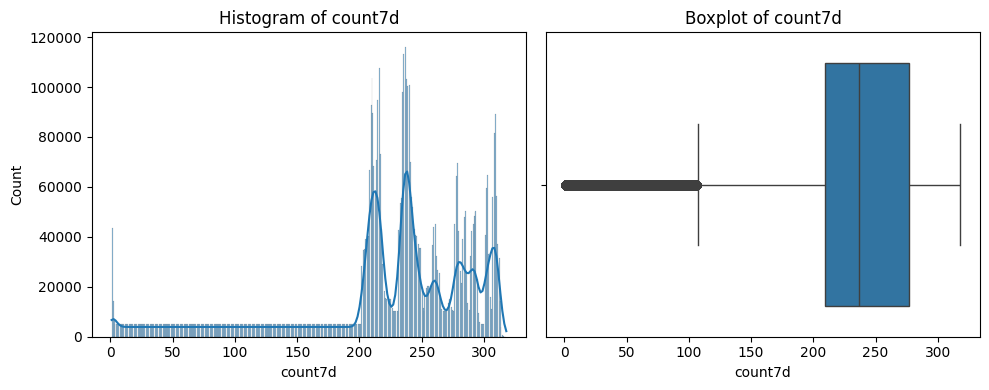

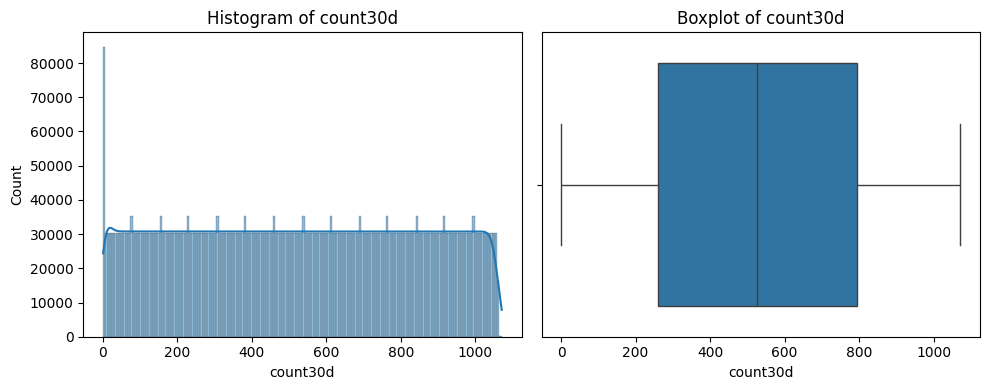

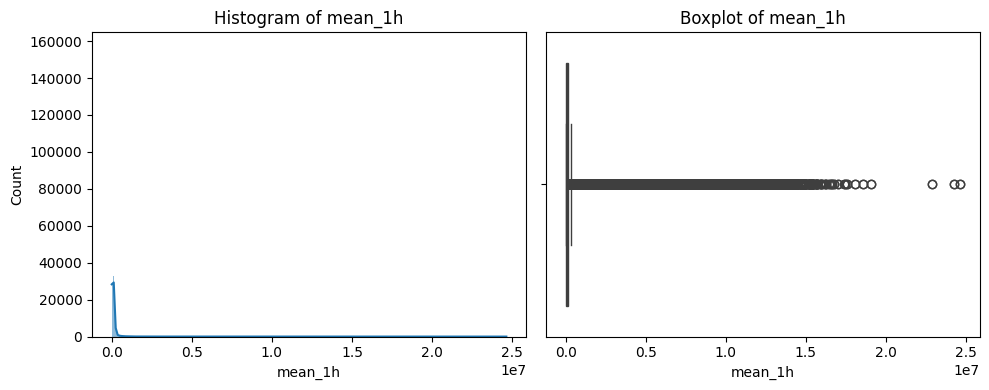

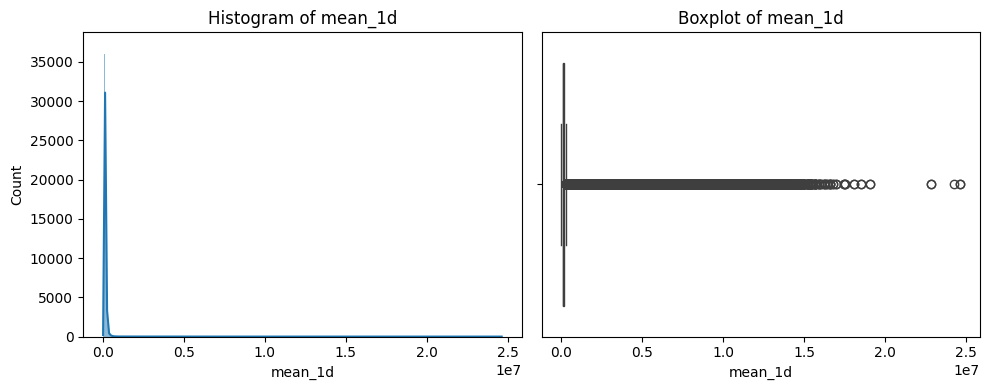

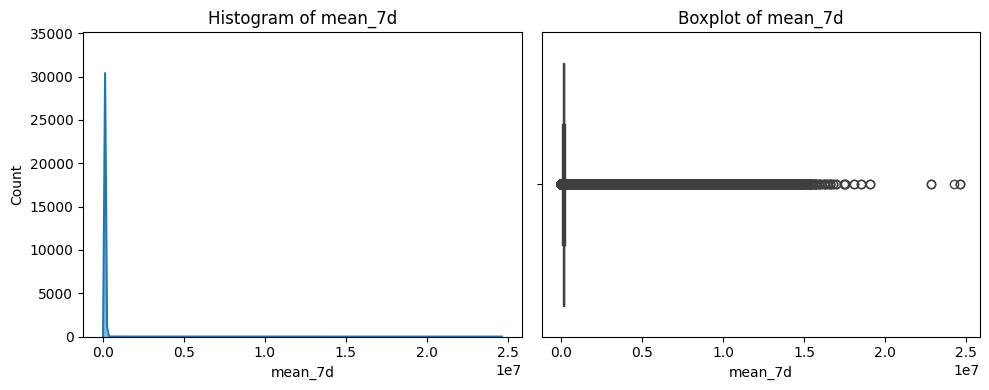

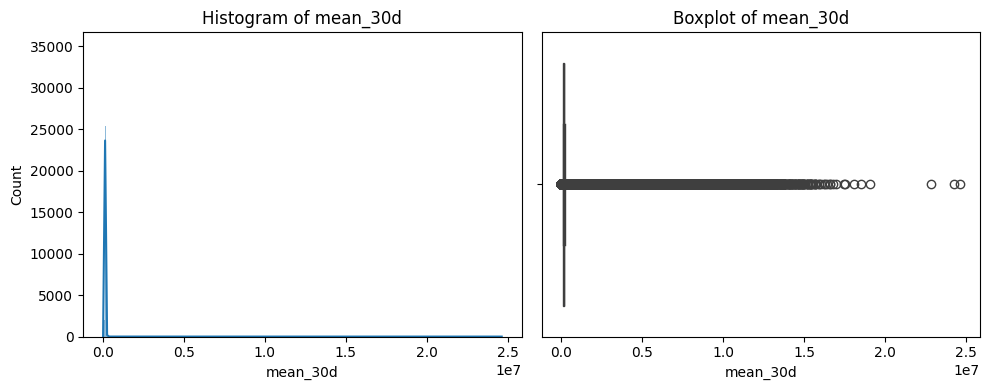

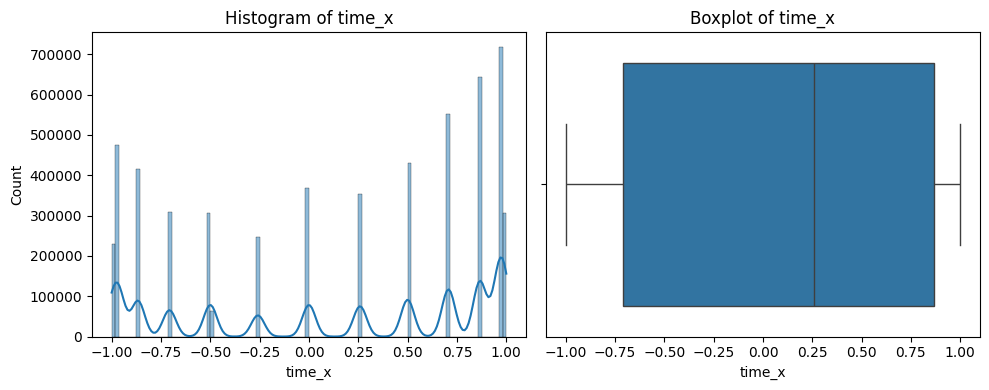

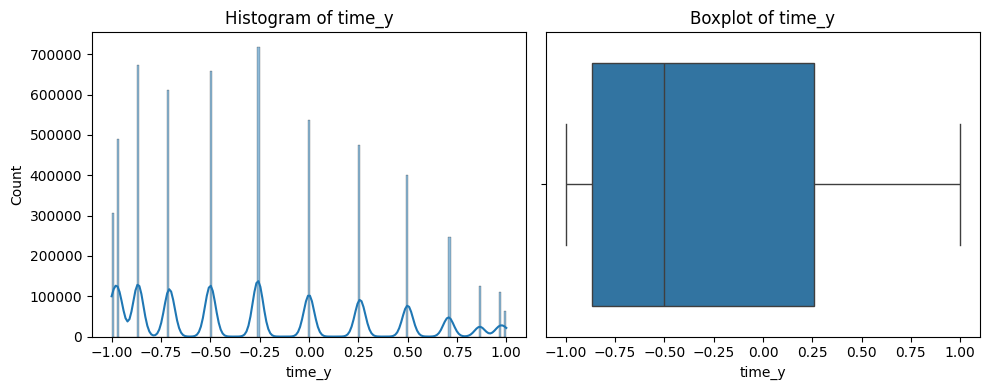

In [26]:
# Iterate over each numerical feature and visualize it
for feature in numerical_features.columns:
    visualize_numerical_feature(feature)


**EDA**

In [27]:
dataset.isnull().sum()



,0
Unnamed: 0,0
step,0
action,0
amount,0
nameOrig,0
oldBalanceOrig,0
newBalanceOrig,0
nameDest,0
oldBalanceDest,0
newBalanceDest,0


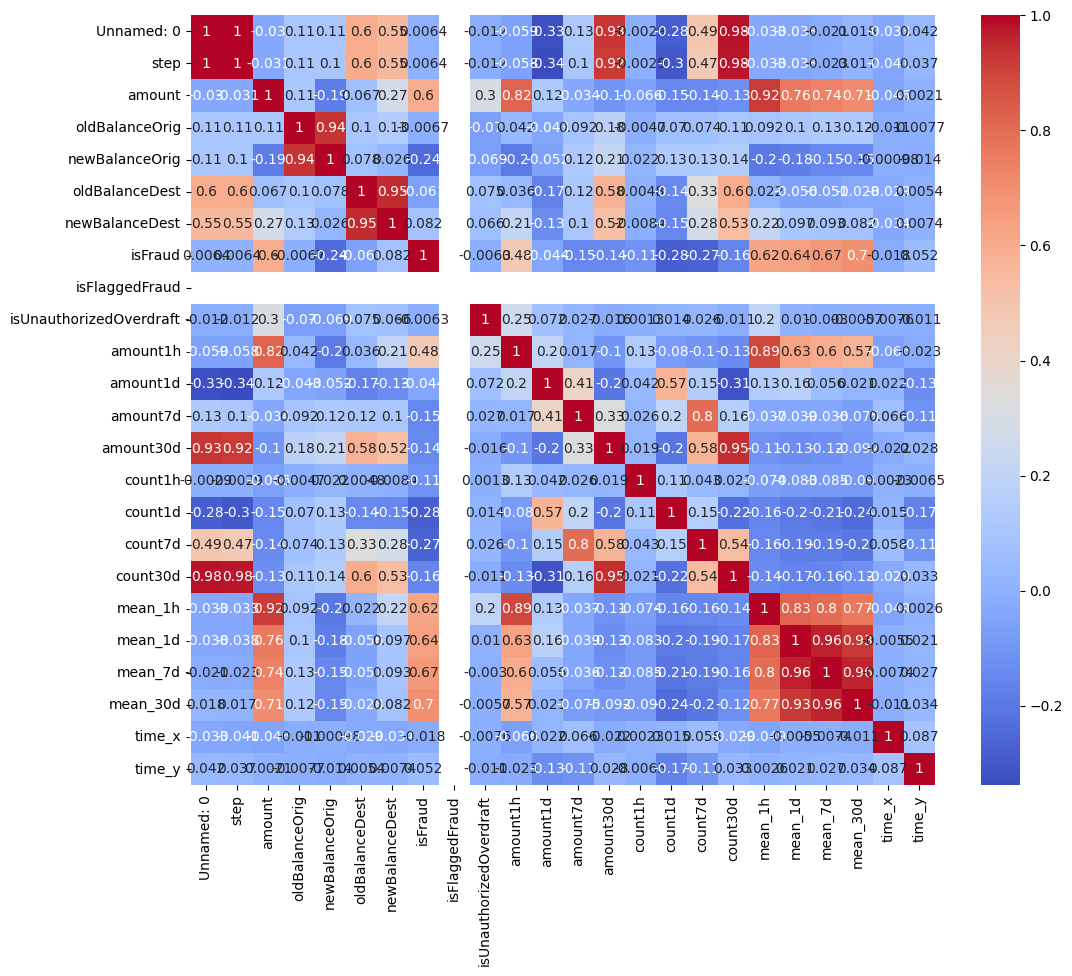

In [33]:
df=pd.DataFrame(numerical_features)
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [28]:
categorical_features=dataset.select_dtypes(include=['object','category']).columns

In [ ]:
categorical_features

Index(['action', 'nameOrig', 'nameDest'], dtype='object')

In [29]:
# Select and display the content of the specific columns
print(dataset[['action', 'nameOrig', 'nameDest']])


           action      nameOrig      nameDest
0        TRANSFER   C5155482480  CC2160409073
1        CASH_OUT  CC2160409073   M2788501400
2        TRANSFER   C6262505545  CC9524765415
3        CASH_OUT  CC9524765415   M3707455010
4        TRANSFER   C6865329088  CC8773639961
...           ...           ...           ...
5420476  CASH_OUT  CC8950372648   M2264102289
5420477  TRANSFER  CC6324734968  CC0186544053
5420478  CASH_OUT  CC0186544053   M0682360470
5420479  TRANSFER   C7243963748  CC2370607553
5420480  CASH_OUT  CC2370607553   M9351186455

[5420481 rows x 3 columns]


In [ ]:
def visualize_numerical_features(df, numerical_features):
    plt.figure(figsize=(15, len(numerical_features)*5))  # Set figure size to accommodate all features
    for i, feature in enumerate(numerical_features):
        plt.subplot(len(numerical_features), 1, i + 1)  # Create subplots
        sns.histplot(df[feature], kde=True)  # Plot histogram with KDE
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Call the function with your dataframe and numerical features
visualize_numerical_features(dataset, numerical_features)

In [ ]:
from sklearn.preprocessing import StandardScaler
caler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
generator = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_dim=100),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Define the discriminator model
discriminator = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_dim=1),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])